In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from gfe_estimation import estimate_grouped_fixed_effect_model_parameters
#from simulate import *
#from simulation_plot import *

In [2]:
original_data = pd.read_stata('/Users/baharcoskun/Desktop/angrist_for _thesis_data/rsa8399n.dta')

In [3]:
original_data.country.unique()

array(['AT', 'BE', 'CH', 'DE', 'DK', 'ES', 'FI', 'FR', 'GR', 'IE', 'IS',
       'IT', 'LU', 'NL', 'NO', 'PT', 'SE', 'UK'], dtype=object)

decision is whether to have 8 countries and 17 time periods or 17 countries and 5 time periods.

In [9]:
original_data.iloc[104]

year        1983Q2
country         DE
sex              1
wstatus          1
national        DE
             ...  
coor_u           2
coor_e           3
pay_tax         23
tot_tax         53
_merge           3
Name: 104, Length: 311, dtype: object

In [106]:
original_data

,year,country,sex,wstatus,national,grup,age,deu,d83,d84,...,rep_rate,durat,act_lmp,u_dens,u_cov,coor_u,coor_e,pay_tax,tot_tax,_merge
0,1995Q2,AT,1.0,1.0,AT,169.724045,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
1,1996Q2,AT,1.0,1.0,AT,156.479126,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
2,1997Q2,AT,1.0,1.0,AT,152.485016,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
3,1998Q2,AT,1.0,1.0,AT,141.785980,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
4,1999Q2,AT,1.0,1.0,AT,145.588745,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,1995Q2,UK,2.0,1.0,UK,1330.457642,40-44,1.0,0.0,0.0,...,38.0,4.0,6.4,39.099998,2.0,1.0,1.0,13.8,40.799999,3
860,1996Q2,UK,2.0,1.0,UK,1364.269165,40-44,1.0,0.0,0.0,...,38.0,4.0,6.4,39.099998,2.0,1.0,1.0,13.8,40.799999,3
861,1997Q2,UK,2.0,1.0,UK,1374.955200,40-44,1.0,0.0,0.0,...,38.0,4.0,6.4,39.099998,2.0,1.0,1.0,13.8,40.799999,3
862,1998Q2,UK,2.0,1.0,UK,1407.266724,40-44,1.0,0.0,0.0,...,38.0,4.0,6.4,39.099998,2.0,1.0,1.0,13.8,40.799999,3


In [15]:
print(original_data.columns.tolist())

['year', 'country', 'sex', 'wstatus', 'national', 'grup', 'age', 'deu', 'd83', 'd84', 'd85', 'd86', 'd87', 'd88', 'd89', 'd90', 'd91', 'd92', 'd93', 'd94', 'd95', 'd96', 'd97', 'd98', 'd99', 'be', 'dk', 'de', 'gr', 'es', 'fr', 'ie', 'it', 'lu', 'nl', 'at', 'pt', 'fi', 'se', 'uk', 'no', 'is', 'ch', 'trend', 'de91', 'de_91', 'trendbe', 'trendk', 'trende91', 'trend_91', 'trendgr', 'trendes', 'trendfr', 'trendie', 'trendit', 'trendlu', 'trendnl', 'trendat', 'trendpt', 'trendfi', 'trendse', 'trenduk', 'trendno', 'trendis', 'trendch', 'limit1', 'limit2', 'samrate', 'resrate', 'd15_19', 'd20_24', 'd25_29', 'd30_34', 'd35_39', 'd40_44', 'd45_49', 'd50_54', 'd55_59', 'd60_64', 'd65', 'dman', 'demp', 'dunemp', 'dinact', 'natbe', 'natdk', 'natde', 'natgr', 'nates', 'natfr', 'natie', 'natit', 'natlu', 'natnl', 'natat', 'natpt', 'natfi', 'natse', 'natuk', 'natno', 'natis', 'natch', 'dnative', 'eufrgn1', 'neufrgn1', 'eufrgn2', 'neufrgn2', 'post90', 'wbosnia', 'wkosovo', 'nwbosnia', 'nwkosovo', 'nowa

The data consists for 18 countries for a period of 5 years(1995-1999).

I reckon that 
- lne_p is the log of employement population ratio for natives,
- lnf_lf1 is the log of the immigrant share.
- dold is whether the person is older or younger than 40.
- lneu_lf1 log of foreign share with eu nationaility.
- iceland is exluded so the N = 17 and T = 17 and its pretty unbalanced.
- have to deal with nan

In [110]:
original_data.lne_p.unique()

array([-0.1439538 , -0.16067202, -0.15023033, -0.14011717, -0.13308272,
       -0.1885025 , -0.1998685 , -0.2018154 , -0.20980757, -0.20761113,
       -0.29740676, -0.29223007, -0.30152974, -0.2818349 , -0.27551723,
       -0.5707989 , -0.5895687 , -0.5833872 , -0.5776863 , -0.5502477 ,
       -0.18002461, -0.19367293, -0.18480022, -0.16971913, -0.17949238,
       -0.1770509 , -0.1716431 , -0.1641046 , -0.16620505, -0.17069401,
       -0.19310637, -0.21077327, -0.20681705, -0.20935267, -0.20417532,
       -0.20440884, -0.20244794, -0.195149  , -0.20651034, -0.21255013,
       -0.2322397 , -0.2526548 , -0.26508   , -0.23493071, -0.24446732,
       -0.23286153, -0.23861156, -0.25452587, -0.24948384, -0.23750305,
       -0.24598011, -0.24223252, -0.24306868, -0.23919854, -0.57473546,
       -0.5709553 , -0.55730987, -0.537246  , -0.53064626, -0.506215  ,
       -0.48950803, -0.47382897, -0.43149608, -0.3904735 , -0.4079319 ,
       -0.41932905, -0.42003387, -0.4174329 , -0.40145475, -0.40

In [93]:
original_data[original_data['lnf_lf1'].isna()]

,year,country,sex,wstatus,national,grup,age,deu,d83,d84,...,rep_rate,durat,act_lmp,u_dens,u_cov,coor_u,coor_e,pay_tax,tot_tax,_merge
104,1983Q2,DE,1.0,1.0,DE,1423.799927,20-24,1.0,1.0,0.0,...,63.0,4.0,25.700001,32.900002,3.0,2.0,3.0,23.0,53.0,3
121,1983Q2,DE,1.0,1.0,DE,2064.599854,40-44,1.0,1.0,0.0,...,63.0,4.0,25.700001,32.900002,3.0,2.0,3.0,23.0,53.0,3
138,1983Q2,DE,2.0,1.0,DE,1325.399902,20-24,1.0,1.0,0.0,...,63.0,4.0,25.700001,32.900002,3.0,2.0,3.0,23.0,53.0,3
155,1983Q2,DE,2.0,1.0,DE,1255.999878,40-44,1.0,1.0,0.0,...,63.0,4.0,25.700001,32.900002,3.0,2.0,3.0,23.0,53.0,3
520,1995Q2,IS,1.0,1.0,IS,7.150680,20-24,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
521,1996Q2,IS,1.0,1.0,IS,7.460360,20-24,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
522,1997Q2,IS,1.0,1.0,IS,6.736630,20-24,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
523,1998Q2,IS,1.0,1.0,IS,7.316700,20-24,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
525,1995Q2,IS,1.0,1.0,IS,8.833110,40-44,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
526,1996Q2,IS,1.0,1.0,IS,8.882500,40-44,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [109]:
def data_management():
    a = original_data[original_data['country'] != 'IS']   
    return a

In [105]:
original_data[original_data['country'] != 'IS']

,year,country,sex,wstatus,national,grup,age,deu,d83,d84,...,rep_rate,durat,act_lmp,u_dens,u_cov,coor_u,coor_e,pay_tax,tot_tax,_merge
0,1995Q2,AT,1.0,1.0,AT,169.724045,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
1,1996Q2,AT,1.0,1.0,AT,156.479126,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
2,1997Q2,AT,1.0,1.0,AT,152.485016,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
3,1998Q2,AT,1.0,1.0,AT,141.785980,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
4,1999Q2,AT,1.0,1.0,AT,145.588745,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,1995Q2,UK,2.0,1.0,UK,1330.457642,40-44,1.0,0.0,0.0,...,38.0,4.0,6.4,39.099998,2.0,1.0,1.0,13.8,40.799999,3
860,1996Q2,UK,2.0,1.0,UK,1364.269165,40-44,1.0,0.0,0.0,...,38.0,4.0,6.4,39.099998,2.0,1.0,1.0,13.8,40.799999,3
861,1997Q2,UK,2.0,1.0,UK,1374.955200,40-44,1.0,0.0,0.0,...,38.0,4.0,6.4,39.099998,2.0,1.0,1.0,13.8,40.799999,3
862,1998Q2,UK,2.0,1.0,UK,1407.266724,40-44,1.0,0.0,0.0,...,38.0,4.0,6.4,39.099998,2.0,1.0,1.0,13.8,40.799999,3


In [103]:
original_data[original_data['lnf_lf1'].isna() == True]

,year,country,sex,wstatus,national,grup,age,deu,d83,d84,...,rep_rate,durat,act_lmp,u_dens,u_cov,coor_u,coor_e,pay_tax,tot_tax,_merge
104,1983Q2,DE,1.0,1.0,DE,1423.799927,20-24,1.0,1.0,0.0,...,63.0,4.0,25.700001,32.900002,3.0,2.0,3.0,23.0,53.0,3
121,1983Q2,DE,1.0,1.0,DE,2064.599854,40-44,1.0,1.0,0.0,...,63.0,4.0,25.700001,32.900002,3.0,2.0,3.0,23.0,53.0,3
138,1983Q2,DE,2.0,1.0,DE,1325.399902,20-24,1.0,1.0,0.0,...,63.0,4.0,25.700001,32.900002,3.0,2.0,3.0,23.0,53.0,3
155,1983Q2,DE,2.0,1.0,DE,1255.999878,40-44,1.0,1.0,0.0,...,63.0,4.0,25.700001,32.900002,3.0,2.0,3.0,23.0,53.0,3
520,1995Q2,IS,1.0,1.0,IS,7.150680,20-24,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
521,1996Q2,IS,1.0,1.0,IS,7.460360,20-24,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
522,1997Q2,IS,1.0,1.0,IS,6.736630,20-24,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
523,1998Q2,IS,1.0,1.0,IS,7.316700,20-24,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
525,1995Q2,IS,1.0,1.0,IS,8.833110,40-44,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
526,1996Q2,IS,1.0,1.0,IS,8.882500,40-44,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [7]:
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

In [104]:
original_data[['country','year','sex', 'national','lne_p','lnf_lf1']]

,country,year,sex,national,lne_p,lnf_lf1
0,AT,1995Q2,1.0,AT,-0.143954,-2.468772
1,AT,1996Q2,1.0,AT,-0.160672,-2.468205
2,AT,1997Q2,1.0,AT,-0.150230,-2.424959
3,AT,1998Q2,1.0,AT,-0.140117,-2.476395
4,AT,1999Q2,1.0,AT,-0.133083,-2.502741
...,...,...,...,...,...,...
859,UK,1995Q2,2.0,UK,-0.378421,-3.830824
860,UK,1996Q2,2.0,UK,-0.367752,-3.825722
861,UK,1997Q2,2.0,UK,-0.372215,-3.760098
862,UK,1998Q2,2.0,UK,-0.356910,-3.681319


In [43]:
df = original_data.drop(original_data[original_data['is'] == 1].index)
df = df.drop(df[df['lnf_lf1'].isna()].index)
#iceland which is excluded from the anaylis!

In [69]:
df[df['year'] == '1994Q2']

,year,country,sex,wstatus,national,grup,age,deu,d83,d84,...,rep_rate,durat,act_lmp,u_dens,u_cov,coor_u,coor_e,pay_tax,tot_tax,_merge
31,1994Q2,BE,1.0,1.0,BE,162.254395,20-24,1.0,0.0,0.0,...,60.0,4.0,14.600000,51.200001,3.0,2.0,2.0,21.500000,49.799999,3
48,1994Q2,BE,1.0,1.0,BE,291.949493,40-44,1.0,0.0,0.0,...,60.0,4.0,14.600000,51.200001,3.0,2.0,2.0,21.500000,49.799999,3
65,1994Q2,BE,2.0,1.0,BE,142.866501,20-24,1.0,0.0,0.0,...,60.0,4.0,14.600000,51.200001,3.0,2.0,2.0,21.500000,49.799999,3
82,1994Q2,BE,2.0,1.0,BE,199.849701,40-44,1.0,0.0,0.0,...,60.0,4.0,14.600000,51.200001,3.0,2.0,2.0,21.500000,49.799999,3
115,1994Q2,DE,1.0,1.0,DE,1381.076172,20-24,1.0,0.0,0.0,...,63.0,4.0,25.700001,32.900002,3.0,2.0,3.0,23.000000,53.000000,3
132,1994Q2,DE,1.0,1.0,DE,2361.662842,40-44,1.0,0.0,0.0,...,63.0,4.0,25.700001,32.900002,3.0,2.0,3.0,23.000000,53.000000,3
149,1994Q2,DE,2.0,1.0,DE,1431.277344,20-24,1.0,0.0,0.0,...,63.0,4.0,25.700001,32.900002,3.0,2.0,3.0,23.000000,53.000000,3
166,1994Q2,DE,2.0,1.0,DE,1822.840820,40-44,1.0,0.0,0.0,...,63.0,4.0,25.700001,32.900002,3.0,2.0,3.0,23.000000,53.000000,3
183,1994Q2,DK,1.0,1.0,DK,127.981827,20-24,1.0,0.0,0.0,...,90.0,2.5,10.300000,71.400002,3.0,3.0,3.0,0.600000,46.299999,3
200,1994Q2,DK,1.0,1.0,DK,153.422989,40-44,1.0,0.0,0.0,...,90.0,2.5,10.300000,71.400002,3.0,3.0,3.0,0.600000,46.299999,3


In [61]:
df[df['year'] == '1983Q2']

,year,country,sex,wstatus,national,grup,age,deu,d83,d84,...,rep_rate,durat,act_lmp,u_dens,u_cov,coor_u,coor_e,pay_tax,tot_tax,_merge
20,1983Q2,BE,1.0,1.0,BE,213.914337,20-24,1.0,1.0,0.0,...,60.0,4.0,14.6,51.200001,3.0,2.0,2.0,21.500000,49.799999,3
37,1983Q2,BE,1.0,1.0,BE,238.232925,40-44,1.0,1.0,0.0,...,60.0,4.0,14.6,51.200001,3.0,2.0,2.0,21.500000,49.799999,3
54,1983Q2,BE,2.0,1.0,BE,178.215256,20-24,1.0,1.0,0.0,...,60.0,4.0,14.6,51.200001,3.0,2.0,2.0,21.500000,49.799999,3
71,1983Q2,BE,2.0,1.0,BE,114.540466,40-44,1.0,1.0,0.0,...,60.0,4.0,14.6,51.200001,3.0,2.0,2.0,21.500000,49.799999,3
172,1983Q2,DK,1.0,1.0,DK,124.666977,20-24,1.0,1.0,0.0,...,90.0,2.5,10.3,71.400002,3.0,3.0,3.0,0.600000,46.299999,3
189,1983Q2,DK,1.0,1.0,DK,147.567749,40-44,1.0,1.0,0.0,...,90.0,2.5,10.3,71.400002,3.0,3.0,3.0,0.600000,46.299999,3
206,1983Q2,DK,2.0,1.0,DK,125.195137,20-24,1.0,1.0,0.0,...,90.0,2.5,10.3,71.400002,3.0,3.0,3.0,0.600000,46.299999,3
223,1983Q2,DK,2.0,1.0,DK,127.034454,40-44,1.0,1.0,0.0,...,90.0,2.5,10.3,71.400002,3.0,3.0,3.0,0.600000,46.299999,3
316,1983Q2,FR,1.0,1.0,FR,1195.840820,20-24,1.0,1.0,0.0,...,57.0,3.0,8.8,9.800000,3.0,2.0,2.0,38.799999,63.799999,3
333,1983Q2,FR,1.0,1.0,FR,1213.302856,40-44,1.0,1.0,0.0,...,57.0,3.0,8.8,9.800000,3.0,2.0,2.0,38.799999,63.799999,3


In [19]:
df['lnf_lf1'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
859    False
860    False
861    False
862    False
863    False
Name: lnf_lf1, Length: 844, dtype: bool

# K- Means

In [21]:
X = np.array([df['lnf_lf1'], df['lne_p']]).T

In [12]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [26]:
kmeans.cluster_centers_

array([[-5.0899143 , -0.48047727],
       [-3.4954388 , -0.3642828 ]], dtype=float32)

In [38]:
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(X)

In [39]:
kmeans3.cluster_centers_

array([[-3.096373  , -0.3317529 ],
       [-5.2458    , -0.5257802 ],
       [-3.9730768 , -0.37539825]], dtype=float32)

In [37]:
X = np.array([df['lnf_lf1'], df['lne_p']]).T

In [131]:
X = np.array([ df.lnf_lf1[df['year']=='1996Q2'], df.lnf_lf1[df['year']=='1997Q2'],
              df.lnf_lf1[df['year']=='1998Q2'], df.lnf_lf1[df['year']=='1999Q2']]).T

In [120]:
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans2.cluster_centers_

array([[-3.974343 , -3.9158995, -3.7868683, -3.792408 ],
       [-2.7192316, -2.728365 , -2.7283013, -2.7124379],
       [-4.7740397, -4.7387104, -4.626737 , -4.555373 ],
       [-3.2401626, -3.2938845, -3.2721596, -3.274676 ],
       [-5.456469 , -5.3089924, -4.9355125, -4.738922 ]], dtype=float32)

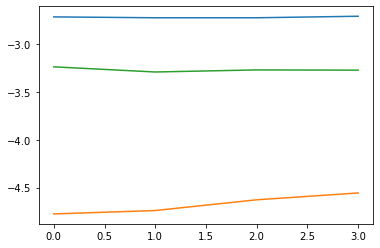

In [122]:
plt.plot(kmeans2.cluster_centers_[1])
plt.plot(kmeans2.cluster_centers_[2])
plt.plot(kmeans2.cluster_centers_[3])


In [75]:
kmeans1 = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans1.cluster_centers_

array([[-3.2866628, -3.278416 , -3.1883786, -3.1774259],
       [-4.6724167, -4.6113153, -4.4723024, -4.407865 ]], dtype=float32)

In [113]:
kmeansy = KMeans(n_clusters=2, random_state=0).fit(y)
kmeansy.cluster_centers_

array([[-0.27249992, -0.26400352, -0.2514487 , -0.23672536],
       [-0.82267725, -0.7966154 , -0.764186  , -0.72105026]],
      dtype=float32)

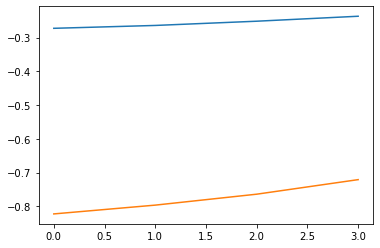

In [116]:
plt.plot(kmeansy.cluster_centers_[0])
plt.plot(kmeansy.cluster_centers_[1])

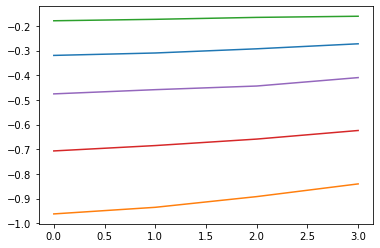

In [119]:
kmeansy3 = KMeans(n_clusters=3, random_state=0).fit(y)
kmeansy3.cluster_centers_
plt.plot(kmeansy3.cluster_centers_[0])
plt.plot(kmeansy3.cluster_centers_[1])
plt.plot(kmeansy3.cluster_centers_[2])
plt.plot(kmeansy3.cluster_centers_[3])
plt.plot(kmeansy3.cluster_centers_[4])

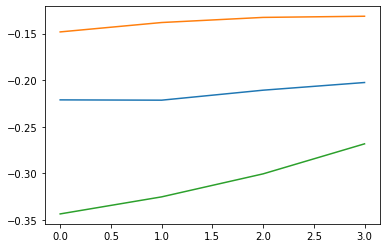

In [132]:
kmeansy3 = KMeans(n_clusters=3, random_state=0).fit(y)
kmeansy3.cluster_centers_
plt.plot(kmeansy3.cluster_centers_[0])
plt.plot(kmeansy3.cluster_centers_[1])
plt.plot(kmeansy3.cluster_centers_[2])

In [133]:
kmeansy3.cluster_centers_

array([[-0.22120555, -0.22152969, -0.21080211, -0.2025579 ],
       [-0.14819555, -0.13810575, -0.13260736, -0.13136262],
       [-0.34371567, -0.32540306, -0.3006936 , -0.26843384]],
      dtype=float32)

In [140]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(y)
kmeans.cluster_centers_

array([[-0.22120555, -0.22152969, -0.21080211, -0.2025579 ],
       [-0.14819555, -0.13810575, -0.13260736, -0.13136262],
       [-0.34371567, -0.32540306, -0.3006936 , -0.26843384]],
      dtype=float32)

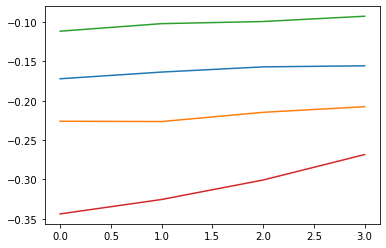

In [139]:
plt.plot(kmeans.cluster_centers_[0])
plt.plot(kmeans.cluster_centers_[1])
plt.plot(kmeans.cluster_centers_[2])
plt.plot(kmeans.cluster_centers_[3])

IndexError: index 2 is out of bounds for axis 0 with size 2

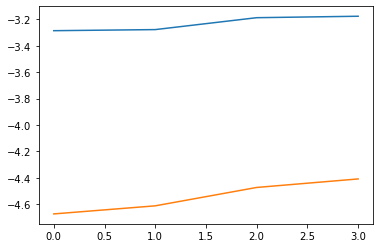

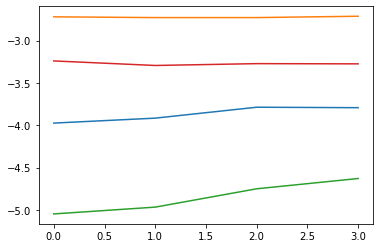

In [85]:
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(X)
#kmeans4.cluster_centers_
plt.plot(kmeans4.cluster_centers_[0])
plt.plot(kmeans4.cluster_centers_[1])
plt.plot(kmeans4.cluster_centers_[2])
plt.plot(kmeans4.cluster_centers_[3])

In [86]:
kmeans4.cluster_centers_

array([[-3.974343 , -3.9158995, -3.7868683, -3.792408 ],
       [-2.7192316, -2.728365 , -2.7283013, -2.7124379],
       [-5.0470114, -4.9668236, -4.750247 , -4.6287923],
       [-3.2401626, -3.2938845, -3.2721596, -3.274676 ]], dtype=float32)

In [107]:
X.flatten().reshape((272,1))@np.array([-0.021])

array([0.0518323 , 0.05092414, 0.0520043 , 0.05255756, 0.0518323 ,
       0.05092414, 0.0520043 , 0.05255756, 0.0518323 , 0.05092414,
       0.0520043 , 0.05255756, 0.0518323 , 0.05092414, 0.0520043 ,
       0.05255756, 0.07950451, 0.08036271, 0.07810443, 0.07613956,
       0.07950451, 0.08036271, 0.07810443, 0.07613956, 0.07950451,
       0.08036271, 0.07810443, 0.07613956, 0.07950451, 0.08036271,
       0.07810443, 0.07613956, 0.0606784 , 0.06175571, 0.06039192,
       0.05969962, 0.0606784 , 0.06175571, 0.06039192, 0.05969962,
       0.0606784 , 0.06175571, 0.06039192, 0.05969962, 0.0606784 ,
       0.06175571, 0.06039192, 0.05969962, 0.05880091, 0.05920714,
       0.05948677, 0.0586264 , 0.05880091, 0.05920714, 0.05948677,
       0.0586264 , 0.05880091, 0.05920714, 0.05948677, 0.0586264 ,
       0.05880091, 0.05920714, 0.05948677, 0.0586264 , 0.08962654,
       0.08651683, 0.08503025, 0.08691147, 0.08962654, 0.08651683,
       0.08503025, 0.08691147, 0.08962654, 0.08651683, 0.08503

In [95]:
y.flatten().size

272

In [94]:
272/4

68.0

In [101]:
y.flatten().reshape((272,1)).shape

(272, 1)

In [130]:
y = np.array([ df.lne_p[df['year']=='1996Q2'], df.lne_p[df['year']=='1997Q2'],
              df.lne_p[df['year']=='1998Q2'], df.lne_p[df['year']=='1999Q2']]).T

In [115]:
estimate_grouped_fixed_effect_model_parameters(outcome=y.flatten(), ngroups=2, nperiods=4, nindividuals=68,
                                               alpha_0=np.array([-0.25, -0.24, -0.23 , -0.22,
                                                                -0.82267725, -0.7966154 , -0.764186 , -0.72105026]), 
                                               theta_0=np.array([-0.021]), X=X.flatten().reshape((272,1)), nfeatures=1)

(array([ 0.06272209, -0.02005475, -0.0129327 , -0.00575068,  0.00682561,
        -0.51784699, -0.49908326, -0.48322072, -0.446867  ]),
 array([0.0084778 , 0.01300056, 0.0129641 , 0.01268915, 0.01179106,
        0.0379923 , 0.03640375, 0.03470459, 0.03343593]))

In [125]:
estimate_grouped_fixed_effect_model_parameters(outcome=y.flatten(), ngroups=3, nperiods=4, nindividuals=68,
                                               alpha_0=np.array([-0.22, -0.21, -0.20 , -0.19,-0.89, -0.87 , -0.83 , -0.78,-0.46205646, -0.44843933, -0.4343658 , -0.4011914]), 
                                               theta_0=np.array([-0.021]), X=X.flatten().reshape((272,1)), nfeatures=1)

(array([ 0.01337673, -0.1469624 , -0.14026591, -0.13190774, -0.12663878,
        -0.81057619, -0.78554236, -0.7509161 , -0.70657027, -0.35195222,
        -0.34026902, -0.32531416, -0.29670265]),
 array([0.0072081 , 0.00866188, 0.00912061, 0.00886052, 0.00878451,
        0.03971307, 0.03958137, 0.03798207, 0.03888761, 0.01529502,
        0.01422048, 0.01465198, 0.01428621]))

In [134]:
estimate_grouped_fixed_effect_model_parameters(outcome=y.flatten(), ngroups=2, nperiods=4, nindividuals=34,
                                               alpha_0=np.array([-0.22120555, -0.22152969, -0.21080211, -0.2025579,
                                                                -0.14819555, -0.13810575, -0.13260736, -0.13136262,
                                                                -0.34371567, -0.32540306, -0.3006936 , -0.26843384]), 
                                               theta_0=np.array([-0.021]), X=X.flatten().reshape((136,1)), nfeatures=1)

(array([ 0.05979901, -0.02114766, -0.02102741, -0.01712099, -0.00627422,
         0.07390064,  0.0832286 ,  0.08705861,  0.08967925]),
 array([0.00350618, 0.00628237, 0.00540774, 0.0053947 , 0.00583609,
        0.02623594, 0.02495682, 0.01451059, 0.01341919]))

In [ ]:
estimate_grouped_fixed_effect_model_parameters(outcome=y.flatten(), ngroups=3, nperiods=4, nindividuals=34,
                                               alpha_0=np.array([-0.22120555, -0.22152969, -0.21080211, -0.2025579,
                                                                -0.14819555, -0.13810575, -0.13260736, -0.13136262,
                                                                -0.34371567, -0.32540306, -0.3006936 , -0.26843384]), 
                                               theta_0=np.array([-0.021]), X=X.flatten().reshape((136,1)), nfeatures=1)

In [ ]:
-0.22120555, -0.22152969, -0.21080211, -0.2025579 ],
       [-0.14819555, -0.13810575, -0.13260736, -0.13136262],
       [-0.34371567, -0.32540306, -0.3006936 , -0.26843384

In [127]:
df = df[df['sex']== 1.0]

In [ ]:
[-0.22529441, -0.21699457, -0.20505443, -0.19578485],
       [-0.89461774, -0.8708651 , -0.83157384, -0.7857124 ],
       [-0.46205646, -0.44843933, -0.4343658 , -0.40119147]]

In [35]:
df.lnf_lf1[df['year']=='1983Q2'], df.lnf_lf1[df['year']=='1984Q2'], df.lnf_lf1[df['year']=='1985Q2'], 
              df.lnf_lf1[df['year']=='1986Q2'], df.lnf_lf1[df['year']=='1987Q2'], df.lnf_lf1[df['year']=='1988Q2'],
              df.lnf_lf1[df['year']=='1989Q2'], df.lnf_lf1[df['year']=='1990Q2'], df.lnf_lf1[df['year']=='1991Q2'], 
              df.lnf_lf1[df['year']=='1992Q2'], df.lnf_lf1[df['year']=='1993Q2'], df.lnf_lf1[df['year']=='1994Q2'],
              df.lnf_lf1[df['year']=='1995Q2'],

SyntaxError: unexpected EOF while parsing (<ipython-input-35-0bc7754264d1>, line 6)

In [29]:
df['year'].unique()

array(['1995Q2', '1996Q2', '1997Q2', '1998Q2', '1999Q2', '1983Q2',
       '1984Q2', '1985Q2', '1986Q2', '1987Q2', '1988Q2', '1989Q2',
       '1990Q2', '1991Q2', '1992Q2', '1993Q2', '1994Q2'], dtype=object)

In [36]:
df

,year,country,sex,wstatus,national,grup,age,deu,d83,d84,...,rep_rate,durat,act_lmp,u_dens,u_cov,coor_u,coor_e,pay_tax,tot_tax,_merge
0,1995Q2,AT,1.0,1.0,AT,169.724045,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
1,1996Q2,AT,1.0,1.0,AT,156.479126,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
2,1997Q2,AT,1.0,1.0,AT,152.485016,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
3,1998Q2,AT,1.0,1.0,AT,141.785980,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
4,1999Q2,AT,1.0,1.0,AT,145.588745,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,1995Q2,UK,2.0,1.0,UK,1330.457642,40-44,1.0,0.0,0.0,...,38.0,4.0,6.4,39.099998,2.0,1.0,1.0,13.8,40.799999,3
860,1996Q2,UK,2.0,1.0,UK,1364.269165,40-44,1.0,0.0,0.0,...,38.0,4.0,6.4,39.099998,2.0,1.0,1.0,13.8,40.799999,3
861,1997Q2,UK,2.0,1.0,UK,1374.955200,40-44,1.0,0.0,0.0,...,38.0,4.0,6.4,39.099998,2.0,1.0,1.0,13.8,40.799999,3
862,1998Q2,UK,2.0,1.0,UK,1407.266724,40-44,1.0,0.0,0.0,...,38.0,4.0,6.4,39.099998,2.0,1.0,1.0,13.8,40.799999,3


In [39]:
original_data.wstatus.unique()

array([1.], dtype=float32)

In [ ]:
chs_data["mom_id"]=chs_data["mom_id"].astype(int) #make sure data type is integer
chs_data["child_id"]=chs_data["child_id"].astype(int)

In [44]:
original_data[original_data['dman'] == 1]

,year,country,sex,wstatus,national,grup,age,deu,d83,d84,...,rep_rate,durat,act_lmp,u_dens,u_cov,coor_u,coor_e,pay_tax,tot_tax,_merge
0,1995Q2,AT,1.0,1.0,AT,169.724045,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
1,1996Q2,AT,1.0,1.0,AT,156.479126,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
2,1997Q2,AT,1.0,1.0,AT,152.485016,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
3,1998Q2,AT,1.0,1.0,AT,141.785980,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
4,1999Q2,AT,1.0,1.0,AT,145.588745,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,1995Q2,UK,1.0,1.0,UK,1561.511963,40-44,1.0,0.0,0.0,...,38.0,4.0,6.4,39.099998,2.0,1.0,1.0,13.8,40.799999,3
826,1996Q2,UK,1.0,1.0,UK,1544.634399,40-44,1.0,0.0,0.0,...,38.0,4.0,6.4,39.099998,2.0,1.0,1.0,13.8,40.799999,3
827,1997Q2,UK,1.0,1.0,UK,1581.026855,40-44,1.0,0.0,0.0,...,38.0,4.0,6.4,39.099998,2.0,1.0,1.0,13.8,40.799999,3
828,1998Q2,UK,1.0,1.0,UK,1643.113525,40-44,1.0,0.0,0.0,...,38.0,4.0,6.4,39.099998,2.0,1.0,1.0,13.8,40.799999,3


In [47]:
original_data[original_data.country == 'UK'].trenduk.head(20)

796    1983.0
797    1984.0
798    1985.0
799    1986.0
800    1987.0
801    1988.0
802    1989.0
803    1990.0
804    1991.0
805    1992.0
806    1993.0
807    1994.0
808    1995.0
809    1996.0
810    1997.0
811    1998.0
812    1999.0
813    1983.0
814    1984.0
815    1985.0
Name: trenduk, dtype: float32

In [49]:
original_data.head(30)

,year,country,sex,wstatus,national,grup,age,deu,d83,d84,...,rep_rate,durat,act_lmp,u_dens,u_cov,coor_u,coor_e,pay_tax,tot_tax,_merge
0,1995Q2,AT,1.0,1.0,AT,169.724045,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
1,1996Q2,AT,1.0,1.0,AT,156.479126,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
2,1997Q2,AT,1.0,1.0,AT,152.485016,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
3,1998Q2,AT,1.0,1.0,AT,141.785980,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
4,1999Q2,AT,1.0,1.0,AT,145.588745,20-24,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
5,1995Q2,AT,1.0,1.0,AT,213.162476,40-44,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
6,1996Q2,AT,1.0,1.0,AT,216.748566,40-44,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
7,1997Q2,AT,1.0,1.0,AT,222.409973,40-44,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
8,1998Q2,AT,1.0,1.0,AT,230.745361,40-44,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3
9,1999Q2,AT,1.0,1.0,AT,242.889297,40-44,1.0,0.0,0.0,...,50.0,2.0,8.3,46.200001,3.0,3.0,3.0,22.6,53.700001,3


In [52]:
?estimate_grouped_fixed_effect_model_parameters

Signature:
estimate_grouped_fixed_effect_model_parameters(
    outcome,
    ngroups,
    nperiods,
    nindividuals,
    alpha_0,
    theta_0,
    X,
    nfeatures,
)
Docstring:
Iterates 

Args:
    outcome (np.ndarray): Dependent variable.
    ngroups (int): Pre-specified total number of groups i.e. G.
    nperiods (int): Number of periods i.e. T.
    nindividuals (int): The number of different individual units in data i.e. N.
    alpha_0 (np.ndarray): Initial starting values for group fixed effect estimates.
    theta_0 (np.ndarray): Initial starting values for 
    X (np.ndarray): nfeatures-d covariate matrix with N*T rows containing
                    arbitrarily correlated values with the group-specific unobservables, 
                    alpha_g_it.

    nfeatures (int): Number of covariates.

Returns:
    np.ndarray: 1-d array that contains gfe model estimates. 
                0:nfeatures time invariant coeefficients and nfeatures: grouped fixed effects' estimates.
File:      

In [61]:
outcome = original_data['lne_p'].to_numpy()

864

In [62]:
covariate = original_data['lnf_lf1'].to_numpy()

In [65]:
from sklearn.cluster import KMeans
import sklearn

In [66]:
grouping = sklearn.cluster.k_means(outcome, 4) #identify groups and estimate GFE.

ValueError: Expected 2D array, got 1D array instead:
array=[-0.1439538  -0.16067202 -0.15023033 -0.14011717 -0.13308272 -0.1885025
 -0.1998685  -0.2018154  -0.20980757 -0.20761113 -0.29740676 -0.29223007
 -0.30152974 -0.2818349  -0.27551723 -0.5707989  -0.5895687  -0.5833872
 -0.5776863  -0.5502477  -0.18002461 -0.19367293 -0.18480022 -0.16971913
 -0.17949238 -0.1770509  -0.1716431  -0.1641046  -0.16620505 -0.17069401
 -0.19310637 -0.21077327 -0.20681705 -0.20935267 -0.20417532 -0.20440884
 -0.20244794 -0.195149   -0.20651034 -0.21255013 -0.2322397  -0.2526548
 -0.26508    -0.23493071 -0.24446732 -0.23286153 -0.23861156 -0.25452587
 -0.24948384 -0.23750305 -0.24598011 -0.24223252 -0.24306868 -0.23919854
 -0.57473546 -0.5709553  -0.55730987 -0.537246   -0.53064626 -0.506215
 -0.48950803 -0.47382897 -0.43149608 -0.3904735  -0.4079319  -0.41932905
 -0.42003387 -0.4174329  -0.40145475 -0.4077481  -0.3532567  -1.1953678
 -1.1531514  -1.1523943  -1.1472754  -1.1539885  -1.1150142  -1.0525577
 -0.9965378  -0.93659025 -0.8991726  -0.84334683 -0.81508493 -0.7838702
 -0.77493024 -0.7329492  -0.6907141  -0.62992847 -0.10325065 -0.10585883
 -0.08997704 -0.07296973 -0.04659547 -0.04449787 -0.056336   -0.05450739
 -0.31297773 -0.2939954  -0.2825577  -0.25106055 -0.32983485 -0.32287666
 -0.30761313 -0.28756326 -0.17874727 -0.1919526  -0.18320058 -0.17687155
 -0.18104523 -0.17009142 -0.16576435 -0.15012969 -0.14753796 -0.15466115
 -0.17467044 -0.17887977 -0.17157029 -0.18446213 -0.18554276 -0.17961857
 -0.1666361  -0.10992534 -0.11717971 -0.13047308 -0.13590702 -0.1434202
 -0.14033806 -0.13141525 -0.12126812 -0.1302206  -0.15617874 -0.1781289
 -0.18730773 -0.19129895 -0.20316426 -0.21569987 -0.21437152 -0.2030675
 -0.5472099  -0.5342225  -0.5100389  -0.49119258 -0.48409107 -0.4723639
 -0.46064585 -0.40609023 -0.35174972 -0.37001666 -0.38817507 -0.3817059
 -0.37907773 -0.37151644 -0.3752168  -0.35814333 -0.33074096 -0.7394937
 -0.73698896 -0.73066396 -0.7164956  -0.7113691  -0.69177735 -0.67490286
 -0.58533734 -0.5110632  -0.5363678  -0.54761314 -0.53962225 -0.51636153
 -0.5016293  -0.48484325 -0.46996644 -0.4361905  -0.1845865  -0.17301123
 -0.14783622 -0.12197154 -0.1367186  -0.14258508 -0.16193986 -0.16764991
 -0.18137947 -0.19071482 -0.22995393 -0.19711474 -0.14257155 -0.13908567
 -0.12462448 -0.13107245 -0.11782226 -0.15537196 -0.16371803 -0.15435089
 -0.13554935 -0.13574725 -0.11374421 -0.12561989 -0.13639352 -0.15057935
 -0.15866396 -0.18151502 -0.16410781 -0.17235093 -0.15651228 -0.13888416
 -0.14691919 -0.14441681 -0.2544115  -0.26833716 -0.24992684 -0.22391482
 -0.21849847 -0.2309166  -0.24558389 -0.24734879 -0.25779557 -0.27157053
 -0.30439237 -0.30844432 -0.31284723 -0.28873014 -0.26576734 -0.2398954
 -0.25456592 -0.39066607 -0.39677477 -0.36372843 -0.3156855  -0.30283308
 -0.27992344 -0.30552995 -0.2728498  -0.2765491  -0.26636758 -0.28955168
 -0.3172301  -0.31707934 -0.3303855  -0.3093505  -0.29844502 -0.26054838
 -0.37579876 -0.34091634 -0.3193438  -0.28983167 -0.26666683 -0.27402616
 -0.31897876 -0.39722335 -0.42068592 -0.4051818  -0.40517214 -0.38675848
 -0.35527438 -0.29991934 -0.24195278 -0.23139825 -0.22563626 -0.21313019
 -0.19945383 -0.19917984 -0.22433329 -0.25471026 -0.27360344 -0.25745347
 -0.25226074 -0.23946705 -0.21651095 -0.20163432 -1.1063049  -1.049036
 -0.99579215 -0.92362386 -0.876605   -0.84835476 -0.8708646  -0.91048366
 -0.9134253  -0.89941895 -0.87346786 -0.8412655  -0.81390643 -0.7325076
 -1.4260705  -1.3943262  -1.340087   -1.3128726  -1.2818205  -1.2600883
 -1.2108074  -1.2070384  -1.203934   -1.1369517  -1.0990899  -1.0498421
 -1.0154614  -0.9753285  -0.34056193 -0.33655167 -0.29640985 -0.26973712
 -0.21483062 -0.3678879  -0.35230002 -0.32055703 -0.2891038  -0.26737106
 -0.4826497  -0.44857585 -0.43243122 -0.43838802 -0.35059988 -0.34369406
 -0.34866637 -0.33206496 -0.29384154 -0.26691636 -0.11256568 -0.1382777
 -0.14905044 -0.15187995 -0.15558621 -0.16355571 -0.15450156 -0.1661477
 -0.18172574 -0.19794102 -0.22901915 -0.2516407  -0.2402167  -0.2444167
 -0.25601077 -0.24854477 -0.24063225 -0.17029005 -0.1897951  -0.19931872
 -0.20337695 -0.2087071  -0.20062962 -0.19825397 -0.19265856 -0.1851778
 -0.18726188 -0.19965255 -0.20870651 -0.20425968 -0.19743644 -0.19605865
 -0.1967096  -0.20379305 -0.43604133 -0.44456223 -0.44537902 -0.4289381
 -0.4533258  -0.4493244  -0.44571975 -0.4379045  -0.43482774 -0.44953796
 -0.45822248 -0.48036078 -0.47404784 -0.47995016 -0.48714125 -0.47787583
 -0.45812228 -0.6267583  -0.6154587  -0.61063117 -0.6026027  -0.5934687
 -0.5786263  -0.55832636 -0.54627484 -0.5148168  -0.5034455  -0.48310742
 -0.47037554 -0.4450294  -0.42694712 -0.42652616 -0.41527104 -0.4103158
 -0.15238713 -0.15851763 -0.16291188 -0.1681353  -0.17382464 -0.16509588
 -0.1719839  -0.17553137 -0.19575247 -0.19633424 -0.20810002 -0.20580903
 -0.2000195  -0.1983691  -0.21554923 -0.2133394  -0.22433321 -0.14269096
 -0.14876717 -0.15011875 -0.14939117 -0.1590629  -0.15719484 -0.15199979
 -0.15426151 -0.16355607 -0.16139875 -0.16253448 -0.1555821  -0.15774958
 -0.146271   -0.14611322 -0.16741283 -0.16888753 -0.923066   -0.9002169
 -0.84482557 -0.8294219  -0.814412   -0.7838766  -0.7468499  -0.7282989
 -0.77703005 -0.7480798  -0.74557275 -0.73706657 -0.7164393  -0.71365166
 -0.69972974 -0.66882414 -0.65330476 -0.9919012  -0.9771694  -0.9478477
 -0.9527252  -0.9565596  -0.9352837  -0.93607205 -0.95465606 -1.0265734
 -0.980884   -0.97448874 -0.9454604  -0.92630553 -0.88966364 -0.87226176
 -0.8768055  -0.85584825 -0.22537553 -0.24696301 -0.26792607 -0.27778417
 -0.28267062 -0.2720735  -0.26564923 -0.2375097  -0.27461427 -0.30206057
 -0.3181546  -0.2888681  -0.25344405 -0.25100455 -0.233936   -0.19699046
 -0.16884892 -0.20427766 -0.2278644  -0.25688946 -0.25891024 -0.2594156
 -0.2641838  -0.2743763  -0.24809498 -0.25585943 -0.27162856 -0.27985656
 -0.27675706 -0.26127794 -0.2514801  -0.25020146 -0.2299492  -0.20839415
 -0.82515466 -0.8277838  -0.8704415  -0.8224627  -0.7730806  -0.7508918
 -0.7136632  -0.66809356 -0.6576568  -0.6422722  -0.6241266  -0.562525
 -0.52069044 -0.50127536 -0.47335923 -0.4257912  -0.38076925 -1.3854752
 -1.4697376  -1.4259759  -1.4727414  -1.4123744  -1.4328499  -1.3928131
 -1.3046228  -1.2789487  -1.2107998  -1.1313077  -1.1041247  -1.049624
 -0.9655481  -0.93567485 -0.83652776 -0.7563332  -0.13421097 -0.11909609
 -0.14996071 -0.12648648 -0.09405982 -0.07387354 -0.05627383 -0.05119794
 -0.03812148 -0.02721948 -0.2546422  -0.2444298  -0.27373597 -0.28765196
 -0.23251739 -0.15055573 -0.14060125 -0.16807227 -0.13486394 -0.12415246
 -0.2436795  -0.2824531  -0.31156814 -0.32438135 -0.33018753 -0.33156368
 -0.31141016 -0.30181816 -0.19460621 -0.19470897 -0.21845694 -0.24036457
 -0.23842892 -0.25121525 -0.24569368 -0.2376862  -0.7218747  -0.768042
 -0.78413856 -0.7924959  -0.79010767 -0.79282    -0.77293456 -0.7455623
 -1.0269909  -1.0029101  -0.99178517 -0.9795854  -0.9542557  -0.94081026
 -0.92394847 -0.8972311  -0.09502158 -0.10309614 -0.11092026 -0.09082939
 -0.10660606 -0.11332048 -0.11897498 -0.14380816 -0.10974539 -0.12543061
 -0.12328864 -0.16050546 -0.17085734 -0.16227251 -0.14580816 -0.13519837
 -0.16070674 -0.19509344 -0.17771858 -0.2025704  -0.18955316 -0.18860787
 -0.1896296  -0.19798236 -0.15230744 -0.19968036 -0.18954912 -0.19391668
 -0.19429809 -0.17857052 -0.1941568  -0.193117   -0.1899892  -0.17205462
 -0.64445084 -0.6236719  -0.5987706  -0.5839022  -0.56305504 -0.56306356
 -0.5791299  -0.5693966  -0.5089802  -0.507785   -0.53315395 -0.5544088
 -0.5968923  -0.56526995 -0.52190036 -0.524811   -0.49020514 -1.4174767
 -1.3711246  -1.3872409  -1.3002002  -1.2851253  -1.3398824  -1.2363904
 -1.1854247  -1.1878445  -1.0480713  -1.0470924  -1.0282454  -1.0776898
 -0.9908449  -0.9724321  -0.88504267 -0.82536733 -0.22808908 -0.21791849
 -0.15616557 -0.1723474  -0.1646558  -0.1501932  -0.13750869 -0.1378765
 -0.15320872 -0.16584708 -0.1529392  -0.13999663 -0.11896779 -0.10412802
 -0.09688593 -0.21795413 -0.21655965 -0.19904092 -0.18276379 -0.18583134
 -0.17381506 -0.18102859 -0.17417108 -0.1824861  -0.18554342 -0.19114949
 -0.18753973 -0.16172914 -0.15343766 -0.14508599 -0.7573133  -0.7124851
 -0.5820051  -0.5745495  -0.5436545  -0.5020941  -0.4684575  -0.41939515
 -0.41013747 -0.38399932 -0.38025922 -0.35599095 -0.3237395  -0.29549754
 -0.26233202 -1.2049774  -1.1577424  -0.9847584  -0.9447736  -0.9342905
 -0.8807685  -0.84621984 -0.7860607  -0.74102443 -0.70839995 -0.69243646
 -0.66572815 -0.6163117  -0.58357006 -0.54073846 -0.21865556 -0.17808488
 -0.14939061 -0.13620484 -0.1433889  -0.12969233 -0.13018905 -0.11738259
 -0.1163002  -0.12219297 -0.3241009  -0.29940096 -0.26511684 -0.23689109
 -0.25199193 -0.26484424 -0.24462983 -0.22654259 -0.2152473  -0.20938237
 -0.16175394 -0.1519644  -0.12955594 -0.12063742 -0.12541108 -0.12055309
 -0.15086813 -0.17174459 -0.20305866 -0.23372649 -0.23826243 -0.22967258
 -0.1734694  -0.17135179 -0.1736972  -0.17755035 -0.17188536 -0.15271905
 -0.15045948 -0.13576043 -0.14703946 -0.16118339 -0.16961771 -0.18118176
 -0.1753165  -0.18163703 -0.1484109  -0.15920092 -0.5424221  -0.48908034
 -0.45057237 -0.41300154 -0.39646745 -0.34298024 -0.35894525 -0.3780536
 -0.41467938 -0.41894048 -0.40905163 -0.40339246 -0.35121953 -0.35573944
 -0.77960247 -0.72204185 -0.6926873  -0.67129815 -0.65365684 -0.57678866
 -0.56937164 -0.5512475  -0.51859367 -0.5192322  -0.5293145  -0.4946311
 -0.48163053 -0.45021757 -0.24329725 -0.2943668  -0.29172635 -0.2779425
 -0.25822994 -0.12975015 -0.15980525 -0.18049534 -0.17582546 -0.16570145
 -0.28828123 -0.33053315 -0.35647318 -0.37167245 -0.32333258 -0.14531797
 -0.17858648 -0.1930992  -0.19878995 -0.17917518 -0.18908757 -0.18652107
 -0.17846094 -0.18650103 -0.1706902  -0.14759101 -0.12781617 -0.12707222
 -0.16534935 -0.20527156 -0.21257019 -0.2053116  -0.18854834 -0.18914604
 -0.1678611  -0.15516298 -0.1542273  -0.16701442 -0.17493062 -0.17413709
 -0.18122055 -0.19331504 -0.1717329  -0.15825464 -0.14969365 -0.16491303
 -0.19803599 -0.21971893 -0.21712352 -0.21482605 -0.20943983 -0.20825145
 -0.19955978 -0.19067891 -0.5857755  -0.5496241  -0.5297293  -0.51562524
 -0.4944108  -0.4555232  -0.40709075 -0.38840103 -0.4081534  -0.40971762
 -0.40614757 -0.40544057 -0.3970546  -0.3831858  -0.3589872  -0.35389403
 -0.33898026 -0.5058382  -0.49018645 -0.4773496  -0.4610091  -0.45310056
 -0.43528238 -0.41257742 -0.39723736 -0.39407414 -0.38238573 -0.3822983
 -0.37625307 -0.37842083 -0.36775205 -0.3722147  -0.35691044 -0.34968755].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [67]:
?sklearn.cluster.k_means

Signature:
sklearn.cluster.k_means(
    X,
    n_clusters,
    *,
    sample_weight=None,
    init='k-means++',
    precompute_distances='deprecated',
    n_init=10,
    max_iter=300,
    verbose=False,
    tol=0.0001,
    random_state=None,
    copy_x=True,
    n_jobs='deprecated',
    algorithm='auto',
    return_n_iter=False,
)
Docstring:
K-means clustering algorithm.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------
X : {array-like, sparse} matrix of shape (n_samples, n_features)
    The observations to cluster. It must be noted that the data
    will be converted to C ordering, which will cause a memory copy
    if the given data is not C-contiguous.

n_clusters : int
    The number of clusters to form as well as the number of
    centroids to generate.

sample_weight : array-like of shape (n_samples,), default=None
    The weights for each observation in X. If None, all observations
    are assigned equal weight

init : {'k-means++', 'random', ndarray, callabl

In [81]:
estimate_grouped_fixed_effect_model_parameters(outcome, ngroups=2, nperiods=17, nindividuals=17,
                                               alpha_0=np.array([-0.178, -0.191, -0.183, 
                                                                                  -0.176, -0.181, -0.170, 
                                                                                  -0.16, -0.15, -0.147, 
                                                                                  -0.154, -0.174, -0.178,
                                                                                  -0.171, -0.184, -0.18,-0.17, 
                                                                                  -0.16,  -0.189,-0.186, -0.178,
                                                                                  -0.186, -0.17, -0.147, -0.127, 
                                                                                  -0.127, -0.165, -0.205, -0.212,
                                                                                  -0.205, 0.188, -0.189, -0.167,
                                                                                  -0.155, -0.154]) , 
                                               theta_0=np.array([-0.021]), X=covariate, nfeatures=1)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 864)

In [69]:
2*17

34

In [73]:
original_data[original_data.country == 'DE'].lne_p.head(17)

104   -0.178747
105   -0.191953
106   -0.183201
107   -0.176872
108   -0.181045
109   -0.170091
110   -0.165764
111   -0.150130
112   -0.147538
113   -0.154661
114   -0.174670
115   -0.178880
116   -0.171570
117   -0.184462
118   -0.185543
119   -0.179619
120   -0.166636
Name: lne_p, dtype: float32

In [77]:
original_data[original_data.country == 'UK'].lne_p.head(17)

796   -0.189088
797   -0.186521
798   -0.178461
799   -0.186501
800   -0.170690
801   -0.147591
802   -0.127816
803   -0.127072
804   -0.165349
805   -0.205272
806   -0.212570
807   -0.205312
808   -0.188548
809   -0.189146
810   -0.167861
811   -0.155163
812   -0.154227
Name: lne_p, dtype: float32